In [91]:

from pandas import  *
from numpy import *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [92]:
df=read_excel('homes.xls')
df

,Obs,Price,SqFt,BedRooms,Baths,Garage,Zip
0,1,52900,932,1,1.0,0,4
1,2,61500,780,3,1.0,0,5
2,3,62000,1500,3,1.0,0,9
3,4,62900,760,2,1.0,0,4
4,5,64900,900,2,1.0,0,4
...,...,...,...,...,...,...,...
499,500,490000,3900,4,3.5,3,5
500,501,535000,3331,5,3.5,3,6
501,502,549000,3615,4,4.5,3,5
502,503,625000,4840,4,4.0,3,6


In [93]:
df.isnull().sum()


Obs         0
Price       0
SqFt        0
BedRooms    0
Baths       0
Garage      0
Zip         0
dtype: int64

In [94]:
df.dropna(inplace=True)
df.isnull().sum()

Obs         0
Price       0
SqFt        0
BedRooms    0
Baths       0
Garage      0
Zip         0
dtype: int64

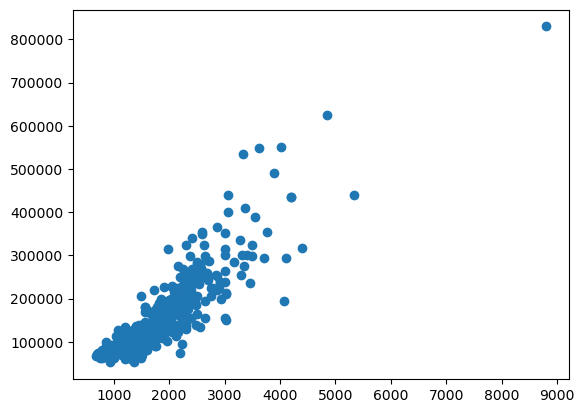

In [95]:
scatter(x='SqFt',y='Price',data= df)

In [96]:
#df1=df.drop('Zip',axis=1)

In [97]:
#df1

In [98]:
#x=(df[['SqFt'	,'BedRooms'	,'Baths']])
#y=(df['Price'])
x=df.iloc[:,2:6]
y=df.iloc[: ,1]

In [99]:
from sklearn.linear_model import  Lasso
ls=Lasso(alpha=0.4)

In [100]:
ls.fit(x,y)

Lasso(alpha=0.4)

In [101]:
ls.coef_

array([   83.14806401, -7524.95920754, 22047.0455964 ,  9314.78081909])

In [102]:
names=x.columns
names

Index(['SqFt', 'BedRooms', 'Baths', 'Garage'], dtype='object')

In [103]:
rng=range(len(names))

Text(0, 0.5, 'LASSO coeff.')

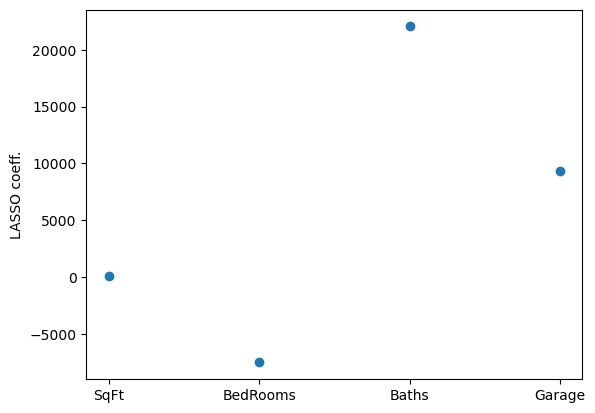

In [104]:
scatter(rng,ls.coef_)
xticks(rng,names)
ylabel('LASSO coeff.')

bathrooms, bedrooms, sqft , garage will be taken as x  and
price as y.

In [105]:
x=df.iloc[:,2:6]    # same as earlier
y=df.iloc[: ,1]

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=227)

In [122]:
r=LinearRegression()
r.fit(x_train,y_train)

LinearRegression()

In [123]:
r.score(x_train,y_train)

0.759824360991362

In [124]:
r.score(x_test,y_test)

0.9214018890070277

In [110]:
from sklearn. svm import SVR
r=SVR(kernel='linear')

In [111]:
r.fit(x,y)

SVR(kernel='linear')

In [112]:
r.score(x,y)

0.7757757343374473

In [113]:
y_pred=r.predict(x_test)


In [114]:
r.predict([[780,3,1,0]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([61059.49632883])

JUST TRYING POLYNOMIAL REG.

In [115]:
from sklearn.preprocessing import PolynomialFeatures
r2=PolynomialFeatures(degree=3)
x2=r2.fit_transform(x)


In [116]:
l=LinearRegression()
l.fit(x2,y)


LinearRegression()

In [117]:
l.score(x2,y)

0.8462743151598414

In [118]:

l.predict(r2.fit_transform([[780,3,1,0]]))

array([69122.75533188])

why SVR failed ?

In [119]:
###
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Assuming 'x' and 'y' are defined with your dataset

max_train_accuracy = 0.0  # Initialize maximum training accuracy
best_train_random_state = 0  # Initialize variable to store the random state of the best training accuracy
max_test_accuracy = 0.0  # Initialize maximum testing accuracy
best_test_random_state = 0  # Initialize variable to store the random state of the best testing accuracy

for i in range(76, 401):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    r=SVR(kernel='linear')
    r.fit(x_train,y_train)  # Train the model
    train_score = r.score(x_train, y_train)  # Calculate accuracy on the training set
    test_score = r.score(x_test, y_test)  # Calculate accuracy on the test set
    
    # Check for the maximum training accuracy
    if train_score > max_train_accuracy:
        max_train_accuracy = train_score
        best_train_random_state = i

    # Check for the maximum testing accuracy
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        best_test_random_state = i

print(f"The maximum training accuracy within the range of random states is: {max_train_accuracy} achieved with random state: {best_train_random_state}")
print(f"The maximum testing accuracy within the range of random states is: {max_test_accuracy} achieved with random state: {best_test_random_state}")


The maximum training accuracy within the range of random states is: 0.8081873907080095 achieved with random state: 401
The maximum testing accuracy within the range of random states is: 0.9260161599863532 achieved with random state: 227


In [120]:
###
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Assuming 'x' and 'y' are defined with your dataset

max_train_accuracy = 0.0  # Initialize maximum training accuracy
best_train_random_state = 0  # Initialize variable to store the random state of the best training accuracy
max_test_accuracy = 0.0  # Initialize maximum testing accuracy
best_test_random_state = 0  # Initialize variable to store the random state of the best testing accuracy

for i in range(76, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    r=LinearRegression()
    r.fit(x_train,y_train)  # Train the model
    train_score = r.score(x_train, y_train)  # Calculate accuracy on the training set
    test_score = r.score(x_test, y_test)  # Calculate accuracy on the test set
    
    # Check for the maximum training accuracy
    if train_score > max_train_accuracy:
        max_train_accuracy = train_score
        best_train_random_state = i

    # Check for the maximum testing accuracy
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        best_test_random_state = i

print(f"The maximum training accuracy within the range of random states is: {max_train_accuracy} achieved with random state: {best_train_random_state}")
print(f"The maximum testing accuracy within the range of random states is: {max_test_accuracy} achieved with random state: {best_test_random_state}")


The maximum training accuracy within the range of random states is: 0.8352089228735835 achieved with random state: 106
The maximum testing accuracy within the range of random states is: 0.9214018890070277 achieved with random state: 227
